In [2]:
import re
from QfromPackage.Qfrom_tab_mod import Qfrom
import pandas as pd
import chardet
import numpy as np
from itertools import groupby
import pickle
import dill
import math
import time
import requests
import json
import ast
import matplotlib.pyplot as plt

In [3]:
def add(a, b):
    return a+b

def increase(x):
    return x+1

In [4]:
Qfrom([1, 2, 1, 4])(set)

{1, 2, 4}

In [5]:
def f(qfrom, a, x):
    return qfrom.edit_column(a, lambda item: item[a]+x)

In [6]:
test_data_set = [
    {'name': 'Ann', 'gender': 'w', 'age': 41, 'job_title': 'manager', 'manager': None, 'salary': 100_000},

    {'name': 'Steven', 'gender': 'm', 'age': 42, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80_000},
    {'name': 'Max', 'gender': 'm', 'age': 31, 'job_title': 'employee', 'manager': 'Steven', 'salary': 60_000},
    {'name': 'Julia', 'gender': 'w', 'age': 35, 'job_title': 'employee', 'manager': 'Steven', 'salary': 50_000},
    {'name': 'Jack', 'gender': 'm', 'age': 38, 'job_title': 'employee', 'manager': 'Steven', 'salary': 48_000},
    {'name': 'Clara', 'gender': 'w', 'age': 32, 'job_title': 'employee', 'manager': 'Steven', 'salary': 45_000},

    {'name': 'Emma', 'gender': 'w', 'age': 48, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80_000},
    {'name': 'Anna', 'gender': 'w', 'age': 29, 'job_title': 'freelancer', 'manager': 'Emma', 'salary': 70_000},
    {'name': 'Bob', 'gender': 'm', 'age': 25, 'job_title': 'freelancer', 'manager': 'Emma', 'salary': 45_000},
    {'name': 'Lena', 'gender': 'w', 'age': 23, 'job_title': 'freelancer', 'manager': 'Emma', 'salary': 38_000},
]

In [7]:
Qfrom(test_data_set).where('age > 35').select('name, age')
Qfrom(test_data_set)\
    .select('age, salary')\
    .order_by('age')\
    .plot(x='age')

global funcs =  ['Iterable', 'Any', 'LifoQueue', 'StringIO', 'split_func_str_by_var', 'split_func_str_coma', 'split_col_in_source_target', 'get_used_vars_from_func_str', 'predicatestr_to_funcstr', 'selectarg_to_funcstr', 'trans_select_func', 'trans_select_func_args', 'trans_predicate_func', 'trans_predicate_func_args', 'trans_groupby_func_args', 'trans_flatten_func_args', 'trans_agg_func_args', 'try_parse_str', 'parse_iterable_to_array', 'parse_iterables_to_arrays', 'try_parse_str_to_collection', 'parse_str_to_collection', 'pass_none', 'first', 'will_be_tranformed_to_array', 'list_to_array', 'iter_table_dict', 'arr_set_value', 'get_func_output_col_count', 'get_func_args', 'get_key_array', 'group_by_dict', 'append_table_dict', 'order_by_table_dict', 'map_table_dict', 'where_table_dict', 'join_table_dict', 'join_cross_table_dict', 'join_id_table_dict', 'concat_table_dict', 'group_by_table_dict', 'flatten_table_dict', 'flattenjoin_table_dict', 'calc_operations', 'Operation', 'Qfrom']


AttributeError: 'Qfrom' object has no attribute 'order_by'

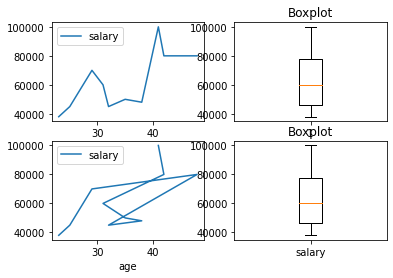

In [ ]:
q = Qfrom(test_data_set)

figure, axis = plt.subplots(2, 2)
q.select('age, salary').order_by('age').plot('age', axis=axis[0,0])
q.where('gender=="w"').select('salary').plot_boxplot(axis=axis[0,1])
q.select('age, salary').plot('age', axis=axis[1,0])
q.where('gender=="w"').select('salary').plot_boxplot(axis=axis[1,1])

plt.show()

In [ ]:
for group in groupby(test_data_set, key=lambda x:x['job_title']):
    print(group)
    for item in group[1]:
        print('\t', item)

('manager', <itertools._grouper object at 0x0000023F82530F10>)
	 {'name': 'Ann', 'gender': 'w', 'age': 41, 'job_title': 'manager', 'manager': None, 'salary': 100000}
	 {'name': 'Steven', 'gender': 'm', 'age': 42, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80000}
('employee', <itertools._grouper object at 0x0000023F8044A830>)
	 {'name': 'Max', 'gender': 'm', 'age': 31, 'job_title': 'employee', 'manager': 'Steven', 'salary': 60000}
	 {'name': 'Julia', 'gender': 'w', 'age': 35, 'job_title': 'employee', 'manager': 'Steven', 'salary': 50000}
	 {'name': 'Jack', 'gender': 'm', 'age': 38, 'job_title': 'employee', 'manager': 'Steven', 'salary': 48000}
	 {'name': 'Clara', 'gender': 'w', 'age': 32, 'job_title': 'employee', 'manager': 'Steven', 'salary': 45000}
('manager', <itertools._grouper object at 0x0000023F8268F100>)
	 {'name': 'Emma', 'gender': 'w', 'age': 48, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80000}
('freelancer', <itertools._grouper object at 0x0000023F826EB9D0>

In [ ]:
Qfrom(test_data_set)\
    .group_by('job_title', 'age')\
    .edit('value', lambda x:len(x['value']))\
    .to_dict()

{'manager': 3, 'employee': 4, 'freelancer': 3}

In [ ]:
Qfrom(test_data_set).norm('age')

Qfrom(	{'name': 'Ann', 'gender': 'w', 'age': 0.8541666666666666, 'job_title': 'manager', 'manager': None, 'salary': 100000}
	{'name': 'Steven', 'gender': 'm', 'age': 0.875, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80000}
	{'name': 'Max', 'gender': 'm', 'age': 0.6458333333333334, 'job_title': 'employee', 'manager': 'Steven', 'salary': 60000}
	{'name': 'Julia', 'gender': 'w', 'age': 0.7291666666666666, 'job_title': 'employee', 'manager': 'Steven', 'salary': 50000}
	{'name': 'Jack', 'gender': 'm', 'age': 0.7916666666666666, 'job_title': 'employee', 'manager': 'Steven', 'salary': 48000}
	{'name': 'Clara', 'gender': 'w', 'age': 0.6666666666666666, 'job_title': 'employee', 'manager': 'Steven', 'salary': 45000}
	{'name': 'Emma', 'gender': 'w', 'age': 1.0, 'job_title': 'manager', 'manager': 'Ann', 'salary': 80000}
	{'name': 'Anna', 'gender': 'w', 'age': 0.6041666666666666, 'job_title': 'freelancer', 'manager': 'Emma', 'salary': 70000}
	{'name': 'Bob', 'gender': 'm', 'age': 0.5208333

In [ ]:
s = 'item1.ab as a, item2.cd, item3.ef as e'
match = re.search('^(\w+(\.\w+)*(\s*as\s*\w+)?)(\s*\,\s*(\w+(\.\w+)*(\s*as\s*\w+)?))*$', s)
match[5]

'item3.ef as e'

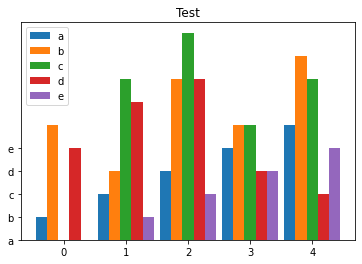

In [ ]:
data = '''a,b,c,d,e
1,5,0,4,a
2,3,7,6,b
3,7,9,7,c
4,5,5,3,d
5,8,7,2,e
'''
Qfrom(data).plot_bar(title='Test')
#Qfrom(test_data_set).plot_histogram()

In [ ]:
import pickletools
def gen():
    for i in range(5):
        yield i

class A():
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.c = 0

    def add_c(self, x):
        self.c += x

    def __repr__(self):
        return 'A('+str(self.a)+', '+str(self.b)+', '+str(self.c)+')'

a = A(1, 2)
a_s = pickle.dumps(a)
a_p = pickle.loads(a_s)
print(pickletools.dis(a_s))

    0: \x80 PROTO      4
    2: \x95 FRAME      44
   11: \x8c SHORT_BINUNICODE '__main__'
   21: \x94 MEMOIZE    (as 0)
   22: \x8c SHORT_BINUNICODE 'A'
   25: \x94 MEMOIZE    (as 1)
   26: \x93 STACK_GLOBAL
   27: \x94 MEMOIZE    (as 2)
   28: )    EMPTY_TUPLE
   29: \x81 NEWOBJ
   30: \x94 MEMOIZE    (as 3)
   31: }    EMPTY_DICT
   32: \x94 MEMOIZE    (as 4)
   33: (    MARK
   34: \x8c     SHORT_BINUNICODE 'a'
   37: \x94     MEMOIZE    (as 5)
   38: K        BININT1    1
   40: \x8c     SHORT_BINUNICODE 'b'
   43: \x94     MEMOIZE    (as 6)
   44: K        BININT1    2
   46: \x8c     SHORT_BINUNICODE 'c'
   49: \x94     MEMOIZE    (as 7)
   50: K        BININT1    0
   52: u        SETITEMS   (MARK at 33)
   53: b    BUILD
   54: .    STOP
highest protocol among opcodes = 4
None


In [ ]:
np.random.randn(5, 3)

array([[-0.06284632,  0.93895365,  0.05164839],
       [-0.25266075,  0.50544075,  0.70600808],
       [-1.89624638,  0.82840752, -0.24783941],
       [ 0.2735269 ,  0.31927161, -0.02751798],
       [ 0.61240254,  0.43629893,  0.20484115]])

In [ ]:
import inspect

a = np.array([0, 0, 0])
def f(item, i):
    return (i, item)

print(len(inspect.signature(f).parameters))
f = np.frompyfunc(f, 2, 2)
f(a, np.arange(a.size))


2


(array([0, 1, 2], dtype=object), array([0, 0, 0], dtype=object))

In [ ]:
api_key = 'a02d201f8e1bd138f446fa59d23e82ec'
city_name = 'Leipzig'
prefix = 'https://'
url = f'{prefix}api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'
#url = f'api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'

#j = requests.get(url).json()
#json.loads(j)
#Qfrom(url)
#match = re.search('^(https://|http://)', url)
#match
#url
#j

In [ ]:
#url = 'https://developer.spotify.com/documentation/web-api/'
#for item in requests.get(url).iter_lines:
#    print(item)
#requests.get(url).iter_lines

In [ ]:
a = 1
b = 2
c = 3
f1 = lambda x:x+a
f2 = lambda x:x+b
def f3(x):
    return x+c

#->
def compined_op(x, t):
    compined_op_output = x
    while True:
        compined_op_output = compined_op_output+t['a']
        break
    while True:
        compined_op_output = compined_op_output+t['b']
        break
    while True:
        compined_op_output = compined_op_output+t['c']
        break
    return compined_op_output

In [ ]:
def get_code_from_lambda(lambda_str):
    return re.sub('.*lambda\s.*:', '', lambda_str)

print(get_code_from_lambda(inspect.getsource(lambda x: x+5)))
[item for item in ast.walk(ast.parse(inspect.getsource(lambda x: x+5)))]

 x+5)))



In [ ]:
a = 1
b = 2
c = 3

f1 = lambda x:x+a
f2 = lambda x:x+b
def f3(x):
    d = 4
    return x+c+d

ops = [f1, f2, f3]
ops_source_lines = [inspect.getsourcelines(op)[0] for op in ops]
ops_closure_vars = [inspect.getclosurevars(op) for op in ops]
ops_names = [op.__name__ for op in ops]
ops_is_lambda = [name == '<lambda>' for name in ops_names]
ops_paras = [op.__code__.co_varnames for op in ops]



print('ops', ops)
print('ops_source_lines', ops_source_lines)
print('ops_closure_vars', ops_closure_vars)
print('ops_names', ops_names)
print('ops_is_lambda', ops_is_lambda)
print('ops_paras', ops_paras)
#inspect.getclosurevars(f3)
#f1.__name__
f1.__code__.co_varnames
f3.__code__.co_freevars

ops [<function <lambda> at 0x0000023F827A1510>, <function <lambda> at 0x0000023F827A3D00>, <function f3 at 0x0000023F827A3A30>]
ops_source_lines [['f1 = lambda x:x+a\n'], ['f2 = lambda x:x+b\n'], ['def f3(x):\n', '    d = 4\n', '    return x+c+d\n']]
ops_closure_vars [ClosureVars(nonlocals={}, globals={'a': 1}, builtins={}, unbound=set()), ClosureVars(nonlocals={}, globals={'b': 2}, builtins={}, unbound=set()), ClosureVars(nonlocals={}, globals={'c': 3}, builtins={}, unbound=set())]
ops_names ['<lambda>', '<lambda>', 'f3']
ops_is_lambda [True, True, False]
ops_paras [('x',), ('x',), ('x', 'd')]


()

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
func = lambda a,t:a+t['a']+t['b']

func = np.frompyfunc(func, 2, 1)
func(arr, {'a':1, 'b':2})

array([4, 5, 6, 7, 8], dtype=object)

In [ ]:
class Obj():
    def __init__(self, a, c):
        self.a = a
        self.b = 0
        self.__c = c

o = Obj(1,2)
inspect.getmembers(o)

[('_Obj__c', 2),
 ('__class__', __main__.Obj),
 ('__delattr__',
  <method-wrapper '__delattr__' of Obj object at 0x0000023F8278FE20>),
 ('__dict__', {'a': 1, 'b': 0, '_Obj__c': 2}),
 ('__dir__', <function Obj.__dir__()>),
 ('__doc__', None),
 ('__eq__', <method-wrapper '__eq__' of Obj object at 0x0000023F8278FE20>),
 ('__format__', <function Obj.__format__(format_spec, /)>),
 ('__ge__', <method-wrapper '__ge__' of Obj object at 0x0000023F8278FE20>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of Obj object at 0x0000023F8278FE20>),
 ('__gt__', <method-wrapper '__gt__' of Obj object at 0x0000023F8278FE20>),
 ('__hash__', <method-wrapper '__hash__' of Obj object at 0x0000023F8278FE20>),
 ('__init__',
  <bound method Obj.__init__ of <__main__.Obj object at 0x0000023F8278FE20>>),
 ('__init_subclass__', <function Obj.__init_subclass__>),
 ('__le__', <method-wrapper '__le__' of Obj object at 0x0000023F8278FE20>),
 ('__lt__', <method-wrapper '__lt__' of Obj object at 0x0000023F8

In [ ]:
a_arr = np.array([1, 2, 3])
b_arr = np.array([4, 5, 6])
ab_arr = np.column_stack((a_arr,b_arr))
for a, b in ab_arr:
    print('a', a, '; b', b)

a 1 ; b 4
a 2 ; b 5
a 3 ; b 6


| a | b | c |
| - | - | - |

In [ ]:
dict(inspect.signature(lambda x,y:1).parameters)

{'x': <Parameter "x">, 'y': <Parameter "y">}

In [ ]:
def f(x, y):
    return 1
(lambda x,y:1).__code__.co_varnames

('x', 'y')

In [ ]:
import re

possible_chars = '[a-zA-Z]'
re.findall('(^|,)(\w+)', 'a, b<3 as c, b in [1, 2, 3] as d, b is not None as e')

In [ ]:
for x in {1, 2, 3} & {2, 3, 4}:
    print(x)

2
3


In [ ]:
np.append(np.array([1, 2, 3]), [None, None, None])

array([1, 2, 3, None, None, None], dtype=object)

In [ ]:
np.full(3, None)

array([None, None, None], dtype=object)

In [ ]:
np.array(np.array([1, 2, None]))

array([1, 2, None], dtype=object)

In [ ]:
class A:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def __iter__(self):
        return iter(self.b)
    def __getitem__(self, key):
        return self.b[key]
    def tolist(self):
        return self.b
    def __str__(self):
        return f'A({self.a}, {self.b})'
    def __repr__(self):
        return str(self)

A(1, [1,2,3]).tolist()

[1, 2, 3]

In [ ]:
np.array(np.array([A(1, [1, 2]), A(2, [3, 4, 5]), A(3, [6])]))

array([A(1, [1, 2]), A(2, [3, 4, 5]), A(3, [6])], dtype=object)

In [ ]:
np.array([A(1, {'a': np.array([1, 2])}), A(2, {'a': np.array([3, 4, 5])})])

array([A(1, {'a': array([1, 2])}), A(2, {'a': array([3, 4, 5])})],
      dtype=object)

In [ ]:
from QfromPackage.Qfrom_tab_mod import Qfrom, first
import numpy as np
 
q = Qfrom({'a':[1, 2, 3], 'b':[4, 5, 6]})
l = [q, q, q]
np.array(l)

array([[[1, 4],
        [2, 5],
        [3, 6]],

       [[1, 4],
        [2, 5],
        [3, 6]],

       [[1, 4],
        [2, 5],
        [3, 6]]])

In [ ]:
q = Qfrom({'a':['a', 'bc', 'd'], 'b':[4, 5, 6]})
q.groupby('len(a)')

Qfrom
key	group
1	Qfrom
a	b
a	4
d	6
2	Qfrom
a	b
bc	5

In [ ]:
q = Qfrom({'a':[1, 2, 3], 'b':[4, 5, 6]})
q['-b']

Qfrom
a
1
2
3

In [ ]:
#q = Qfrom({'a':[1, 2, 3], 'b':[[(1, 2), (3, 4)], [(5, 6)], [(7, 8), (9, 10)], None]})
#q.flatten('b', pass_none=True)
q = Qfrom({'a':[1, 2, 3], 'b':[[(1, 2), (3, 4)], [(5, 6)], [(7, 8), (9, 10)]]})
q.flatten_join('b', 'c, d').select('a,c,d,b')

c:\Users\Max\Documents\Projekte\GitHub\Qfrom\QfromPackage\Qfrom_tab_mod.py:924: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.table_dict = {key:np.array(value) for key, value in collection.items()}


Qfrom
a	c	d	b
1	1	2	[(1, 2), (3, 4)]
1	3	4	[(1, 2), (3, 4)]
2	5	6	[(5, 6)]
3	7	8	[(7, 8), (9, 10)]
3	9	10	[(7, 8), (9, 10)]

In [ ]:
q = Qfrom({'a': [1, 2, 3, 4, None], 'b': [5, 6, 7, 8, 9]})
q.groupby_pn('a%2').flatten('group')
q.groupby_pn('a%2').select(lambda group:group[0], q.columns())

Qfrom
a	b
1	5
2	6
None	9

In [ ]:
a1 = np.array([1, 2, 3])
a2 = np.array([(1, 2), (3, 4), (5, 6)])
a2_ = np.rot90(a2)
i=1
a2_[len(a2_)-1-i]
for i, col in enumerate(a2_[::-1]):
    print(f'{i=}, {col=}')
#a2.shape

i=0, col=array([1, 3, 5])
i=1, col=array([2, 4, 6])


In [ ]:
q = Qfrom({'a': [1, 2, 2, 3, 3], 'b': [5, 5, 5, 6, 7]})
#q.groupby('a,b').select(lambda group:first(group), q.columns())
q.groupby('a,b').select(lambda group:group[0], q.columns())
#q.unique(lambda a,b: a+b)
q.agg('max(a), min(a), sum(a), max(b), min(b), sum(b)')

(3, 3, 6, 7, 2, 9)

In [ ]:
list(zip((1, 2, 3), (4, 5, 6)))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
csv = '''
name,alter,gender,hobbies
konrad,15,m,"videos schauen, zocken, videos drehen, musik hören"
max,24,m,"programmieren, musik spielen, lesen"
lotte,28,w,"puzzlen, lesen"
ferdi,23,m,"physik, musik spielen"
louisa,21,w,"lesen,freund:innen treffen"
'''

q = Qfrom(csv)
q.select_join('i')[1:3]['name, alter, i']

Qfrom
name	alter	i
max	24	1
lotte	28	2

In [ ]:
'abc'[0:2]

'ab'

In [ ]:
def d(**kwrgs):
    return kwrgs
a = (abc=1, de=2)
d(a*)

SyntaxError: invalid syntax (Temp/ipykernel_17072/275586814.py, line 3)

In [ ]:
(1:2:1)

SyntaxError: invalid syntax (Temp/ipykernel_17072/1205179059.py, line 1)

In [ ]:
d={'a':[1,2,3], 'b':[4,5,6]}
d.values()

dict_values([[1, 2, 3], [4, 5, 6]])

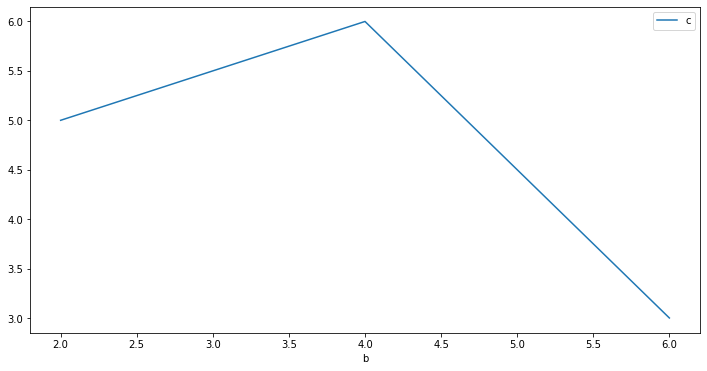

In [ ]:
csv = '''
a,b,c
1,6,3
2,2,5
3,4,6
'''
Qfrom(csv)['b,c'].plot(figsize=(12,6))

In [ ]:
f = lambda *t: print(t)
f(1, 2, 3, 4)

(1, 2, 3, 4)


In [ ]:
q = Qfrom({'a':i, 'b':i+1} for i in range(5))
q['a', 0] = 10
q

Qfrom
a	b
10	1
1	2
2	3
3	4
4	5

In [ ]:
q = Qfrom({'a': [1, 2, 3], 'b': [5, 6, 7]})
#q.agg_pairs(lambda a, b: (a[0]+a[1], b[0]+b[1]))
#q[lambda a,i: (i,a), 'i,a']
q['a', 'b']

args=(('a', 'b'),)


Qfrom
a	b
1	5
2	6
3	7

In [ ]:
data = '''
text,x
a,1
b,2
c,5
d,3
e,7
'''
q = Qfrom(data)
q['text', 0] = 'cbd'
q = q.select_join(lambda a: '', 'tag')
q

Qfrom
text	x	tag
c	1	
b	2	
c	5	
d	3	
e	7	

In [ ]:
q1 = Qfrom({'a':[1, 2, 3], 'b':['a', 'a', 'a']})
q2 = Qfrom({'a':[2, 3, 4], 'b':['b', 'b', 'b']})
q1.join_outer_right(q2, {'a':'a'})

Qfrom
a	b
2	a
3	a
4	b

In [ ]:
q = Qfrom({'a': [1, 2, 3]})
q.select(lambda a: {'a':(a, a+1)})
q.select(lambda a: (a, a+1), 'a')

Qfrom
a
[1 2 3]
[2 3 4]

In [ ]:
np.array([{1, 2}, {2, 3}, {3, 4, 5}])

array([{1, 2}, {2, 3}, {3, 4, 5}], dtype=object)

In [ ]:
class t:
    def __init__(self, *args):
        self.data = list(args)
    
    def __getitem__(self, key):
        return self.data[key]
    
    def __len__(self):
        return len(self.data)

    def __eq__(self, other):
        if type(self) != type(other):
            return False
        return self.data == other.data
    
    def __str__(self):
        data_str = ', '.join(str(item) for item in self.data)
        return f't({data_str})'
    def __repr__(self):
        return str(self)

q = Qfrom({'a': [1, 2, 3]})
q = q.select(lambda a: {'a': t(a, a+1, a+2)})
#np.array(q)
q

Qfrom
a
t(1, 2, 3)
t(2, 3, 4)
t(3, 4, 5)

In [ ]:
Qfrom({'a': [t(1, 2, 3), t(2, 3, 4), t(3, 4, 5)]})

Qfrom
a
[1 2 3]
[2 3 4]
[3 4 5]

In [ ]:
l = [t(1, 2, 3), t(2, 3, 4), t(3, 4, 5)]

a1 = np.empty(3, dtype=object)
a1[:] = l
a2 = np.empty(3, dtype=object)
a2[:] = l

np.array_equal(a1, a2)

True

In [ ]:
q1 = Qfrom({'a': [1, 2, 3]})
q1 = q1.select(lambda a: {'a': t(a, a+1, a+2)})
q2 = Qfrom({'a': [1, 2, 3]})
q2 = q2.select(lambda a: {'a': t(a, a+1, a+2)})
print(q1)
print(q2)
q1 == q2

Qfrom
a
[1 2 3]
[2 3 4]
[3 4 5]
Qfrom
a
[1 2 3]
[2 3 4]
[3 4 5]


True

In [ ]:
q1 = Qfrom({'a': [1, 2, 3]})
q1.select(lambda a: {'a':[a, a+1]})

Qfrom
a
[1, 2]
[2, 3]
[3, 4]

In [ ]:
l = [1, 2, 3]
class_dir = dir(type(l))
'__len__' in class_dir and '__getitem__' in class_dir

True

In [ ]:
d = {'a':1, 'b':2}
for key in d:
    print(key)
'a' in d

a
b


True

In [ ]:
'sum' in dir()
#eval('Qfrom')

False

In [ ]:
def f(x):
    return x+1

eval('f(1)')

2

In [ ]:
import keyword
keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [ ]:
import builtins
'len' in dir(builtins)

True

In [ ]:
f = lambda x: x+1
Qfrom({'a':[1, 2, 3]}).select('f(a)')

f(a) -> lambda f, a: f(a), (0,), lambda x: {0: x[0]}


TypeError: 'int' object is not callable

In [ ]:
#for x in list(globals().values()):
#for x in list(globals().items()):
#    print(x)
#    print('')
print([(key, f) for key, f in globals().items() if callable(f)])

[('get_ipython', <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x000001F76D2FF190>>), ('exit', <IPython.core.autocall.ZMQExitAutocall object at 0x000001F76D2FD8A0>), ('quit', <IPython.core.autocall.ZMQExitAutocall object at 0x000001F76D2FD8A0>), ('Qfrom', <class 'QfromPackage.Qfrom_tab_mod.Qfrom'>), ('groupby', <class 'itertools.groupby'>), ('add', <function add at 0x000001F77F86C550>), ('increase', <function increase at 0x000001F77F86C5E0>), ('f', <function f at 0x000001F77F86C790>)]


In [8]:
f = lambda x:x+1
Qfrom({'a': [1, 2, 3], 'b': [4, 5, 6]}).select('(a, b) as x')#.select('sum(x)')

global funcs =  ['Iterable', 'Any', 'LifoQueue', 'StringIO', 'split_func_str_by_var', 'split_func_str_coma', 'split_col_in_source_target', 'get_used_vars_from_func_str', 'predicatestr_to_funcstr', 'selectarg_to_funcstr', 'trans_select_func', 'trans_select_func_args', 'trans_predicate_func', 'trans_predicate_func_args', 'trans_groupby_func_args', 'trans_flatten_func_args', 'trans_agg_func_args', 'try_parse_str', 'parse_iterable_to_array', 'parse_iterables_to_arrays', 'try_parse_str_to_collection', 'parse_str_to_collection', 'pass_none', 'first', 'will_be_tranformed_to_array', 'list_to_array', 'iter_table_dict', 'arr_set_value', 'get_func_output_col_count', 'get_func_args', 'get_key_array', 'group_by_dict', 'append_table_dict', 'order_by_table_dict', 'map_table_dict', 'where_table_dict', 'join_table_dict', 'join_cross_table_dict', 'join_id_table_dict', 'concat_table_dict', 'group_by_table_dict', 'flatten_table_dict', 'flattenjoin_table_dict', 'calc_operations', 'Operation', 'Qfrom']


Qfrom
x
(1, 4)
(2, 5)
(3, 6)